In [1]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
import matplotlib.pyplot as plt

In [3]:
x_train.shape

(60000, 28, 28)

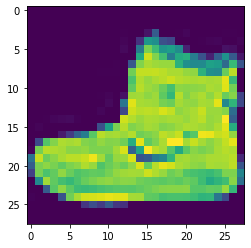

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

9

In [6]:
x_train.max()

255

In [7]:
x_train=x_train/255

In [8]:
x_test=x_test/255

In [9]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [15]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(64,(4,4),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [17]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=6)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 388s 6ms/sample - loss: 0.4061 - acc: 0.8552 - val_loss: 0.2953 - val_acc: 0.8950
Epoch 2/6
60000/60000 [==============================] - 394s 7ms/sample - loss: 0.2584 - acc: 0.9048 - val_loss: 0.2478 - val_acc: 0.9104
Epoch 3/6
60000/60000 [==============================] - 403s 7ms/sample - loss: 0.2138 - acc: 0.9201 - val_loss: 0.2355 - val_acc: 0.9153
Epoch 4/6
60000/60000 [==============================] - 399s 7ms/sample - loss: 0.1784 - acc: 0.9338 - val_loss: 0.2265 - val_acc: 0.9232
Epoch 5/6
60000/60000 [==============================] - 386s 6ms/sample - loss: 0.1495 - acc: 0.9446 - val_loss: 0.2320 - val_acc: 0.9185
Epoch 6/6
60000/60000 [==============================] - 455s 8ms/sample - loss: 0.1259 - acc: 0.9525 - val_loss: 0.2441 - val_acc: 0.92089 - 


In [18]:
model.metrics_names

['loss', 'acc']

In [26]:
import pandas as pd
%matplotlib inline
metrics=pd.DataFrame(model.history.history) 

In [27]:
metrics

,loss,acc,val_loss,val_acc
0,0.406106,0.855217,0.295283,0.8950
1,0.258357,0.904833,0.247772,0.9104
2,0.213762,0.920067,0.235500,0.9153
3,0.178432,0.933833,0.226500,0.9232
4,0.149503,0.944583,0.231998,0.9185
5,0.125940,0.952500,0.244054,0.9208


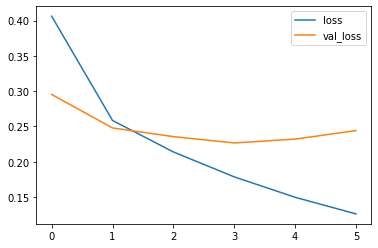

In [34]:
metrics[["loss",'val_loss']].plot()

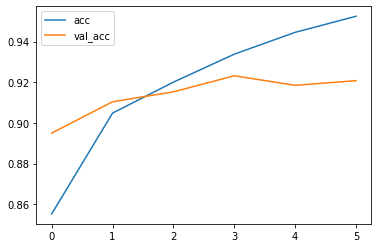

In [36]:
metrics[["acc","val_acc"]].plot()

In [37]:
from sklearn.metrics import classification_report

In [38]:
predictions=model.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       1.00      0.97      0.99      1000
           2       0.88      0.87      0.87      1000
           3       0.94      0.92      0.93      1000
           4       0.86      0.87      0.86      1000
           5       0.99      0.98      0.99      1000
           6       0.76      0.79      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[879   2  22  11   3   0  81   0   2   0]
 [  3 975   1  11   3   0   7   0   0   0]
 [ 23   0 870   5  50   0  52   0   0   0]
 [ 16   0   7 921  28   0  27   0   1   0]
 [  1   0  38  14 867   0  80   0   0   0]
 [  0   0   0   0   0 982   0   9   0   9]
 [ 90   0  51  18  50   0 786   0   5   0]
 [  0   0   0   0   0   3   0 978   0  19]
 [  4   0   3   1   4   1   3   4 979   1]
 [  0   0   1   0   0   3   0  25   0 971]]
